In [218]:
!pip install numpy pandas matplotlib seaborn

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [220]:
sns.__version__

'0.13.2'

💓 1️⃣ 심혈관질환 위험요인 분석 (메인 디쉬급)

핵심 변수: HadHeartAttack, HadAngina, HadStroke, SmokerStatus, BMI, SleepHours, AgeCategory, AlcoholDrinkers, PhysicalActivities

할 수 있는 분석:

흡연·음주·수면시간에 따른 심혈관질환 발생률 비교 (barplot, heatmap)

BMI 구간별 심장질환 비율

로지스틱 회귀로 위험도 예측 (feature importance 시각화)

연령대별 위험도 곡선(lineplot)

🍽 인사이트 맛: “운동하지 않고 수면이 짧은 고BMI 흡연군은 위험률이 2배↑”

In [221]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df = df.drop(['RemovedTeeth', 'DeafOrHardOfHearing', 'HadSkinCancer', 'LastCheckupTime', 'DifficultyWalking', 'HadArthritis', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear'], axis=1)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,No,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,Use them some days,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes


In [222]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'PneumoVaxEver', 'CovidPos'],
      dtype='object')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288597 entries, 0 to 288596
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   index                  288597 non-null  int64   
 1   State                  288597 non-null  object  
 2   Sex                    288597 non-null  object  
 3   GeneralHealth          288597 non-null  object  
 4   PhysicalHealthDays     288597 non-null  float64 
 5   MentalHealthDays       288597 non-null  float64 
 6   PhysicalActivities     288597 non-null  object  
 7   SleepHours             288597 non-null  float64 
 8   HadHeartAttack         288597 non-null  object  
 9   HadAngina              288597 non-null  object  
 10  HadStroke              288597 non-null  object  
 11  HadAsthma              288597 non-null  object  
 12  HadCOPD                288597 non-null  object  
 13  HadDepressiveDisorder  288597 non-null  object  
 14  HadKidneyDisease    

In [293]:
df.describe()

,index,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease_num
count,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000
mean,223405.012398,4.222074,4.217230,7.013035,1.703882,83.403122,28.637781,0.089246
std,128504.857213,8.525216,8.176256,1.331387,0.106734,21.286697,6.512102,0.285098
min,1.000000,0.000000,0.000000,3.000000,0.910000,22.680000,12.020000,0.000000
25%,112782.000000,0.000000,0.000000,6.000000,1.630000,68.040000,24.210000,0.000000
50%,222961.000000,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000,0.000000
75%,334783.000000,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000,0.000000
max,445131.000000,30.000000,30.000000,11.000000,2.410000,292.570000,97.650000,1.000000


In [295]:
df.describe(include='object')

,State,Sex,GeneralHealth,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,...,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos,HeartDisease
count,288597,288597,288597,288597,288597,288597,288597,288597,288597,288597,...,288597,288597,288597,288597,288597,288597,288597,288597,288597,288597
unique,54,2,5,2,2,2,2,2,2,2,...,3,4,4,5,13,2,2,2,3,2
top,Washington,Female,Very good,Yes,No,No,No,No,No,No,...,No,비흡연,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,No
freq,17069,150830,100731,222462,272641,270767,276398,245589,265786,228794,...,241997,172851,222990,218794,33264,156912,191132,170097,196918,262841


## 데이터 결측치 이상치 처리

In [223]:

# 결측치 행 전부 삭제
df = df.dropna().reset_index()

df.head()


,index,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos
0,1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
1,2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
2,4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,Yes,No
3,5,Alabama,Male,Poor,1.0,0.0,No,7.0,Yes,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.80,84.82,26.08,No,No,Yes,No
4,6,Alabama,Female,Very good,0.0,0.0,Yes,7.0,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 80 or older,1.65,62.60,22.96,Yes,No,No,No


In [224]:
# 심근경색 / 협심증 여부를 심장 질환 컬럼하나로 통합
df['HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df['HeartDisease'] = df['HeartDisease'].map({True: 'Yes', False: 'No'})
df['HeartDisease_num'] = df['HeartDisease'].map({'Yes':1, 'No':0})


# 흡연 여부
df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Never smoked': '비흡연',
    'Former smoker': '과거흡연',
    'Current smoker - now smokes some days': '가끔흡연',
    'Current smoker - now smokes every day': '매일흡연'
})

df['bmi_group'] = pd.cut(df['BMI'], bins = [0, 18.5, 25, 30, 35, df['BMI'].max()], labels = ['저체중', '정상체중', '과체중', '비만', '고도비만'])




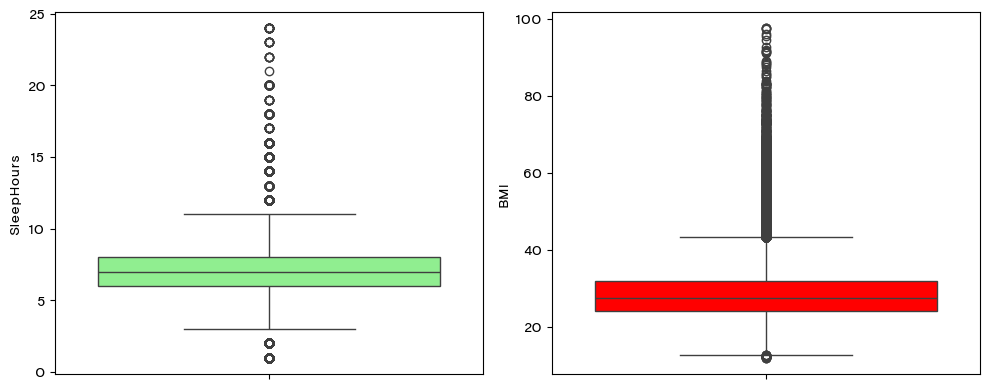

In [225]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(df['SleepHours'], boxprops=dict(facecolor='lightgreen'), ax= ax[0])
sns.boxplot(df['BMI'], boxprops=dict(facecolor='red'), ax = ax[1])


plt.tight_layout()
plt.show()

In [226]:


# 수면시간 이상치
q1 = df['SleepHours'].quantile(0.25)
q3 = df['SleepHours'].quantile(0.75)

iqr = q3 - q1

low = q1 - iqr * 1.5
high = q3 + iqr * 1.5
high

# 하한 이상치는 최소값 / 상한 이상치는 최대값으로 변경
df['SleepHours'] = df['SleepHours'].clip(lower=low, upper=high)

0         26.57
1         25.61
2         21.77
3         26.08
4         22.96
          ...  
288592    24.34
288593    29.86
288594    28.66
288595    32.55
288596    22.60
Name: BMI, Length: 288597, dtype: float64

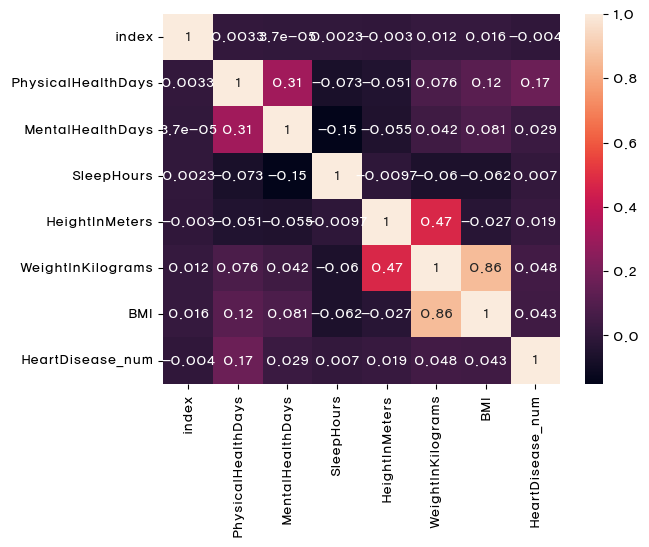

In [299]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True)

df["BMI"]

## 심장질환 여부


In [227]:
font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
plt.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

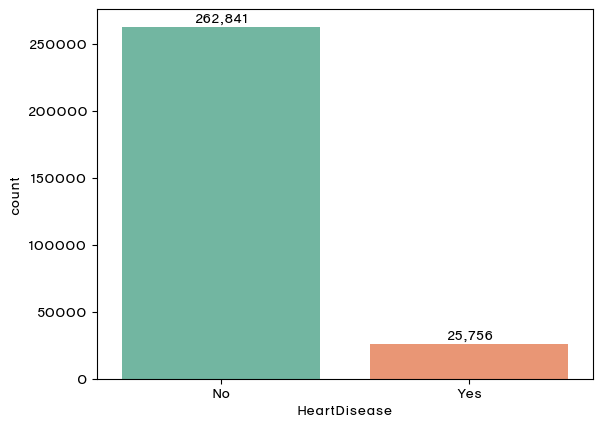

In [228]:


sns.countplot(data=df, x='HeartDisease', palette='Set2', hue='HeartDisease')

heart_counts = df['HeartDisease'].value_counts()

for i, (label, count) in enumerate(heart_counts.items()):
    plt.text(
        i, count + 2000,             
        f'{count:,}',                
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

plt.show()

## 나이 그룹별 심장질환 여부

In [229]:
df['AgeCategory'].unique()

array(['Age 80 or older', 'Age 55 to 59', 'Age 40 to 44', 'Age 65 to 69',
       'Age 75 to 79', 'Age 70 to 74', 'Age 60 to 64', 'Age 50 to 54',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

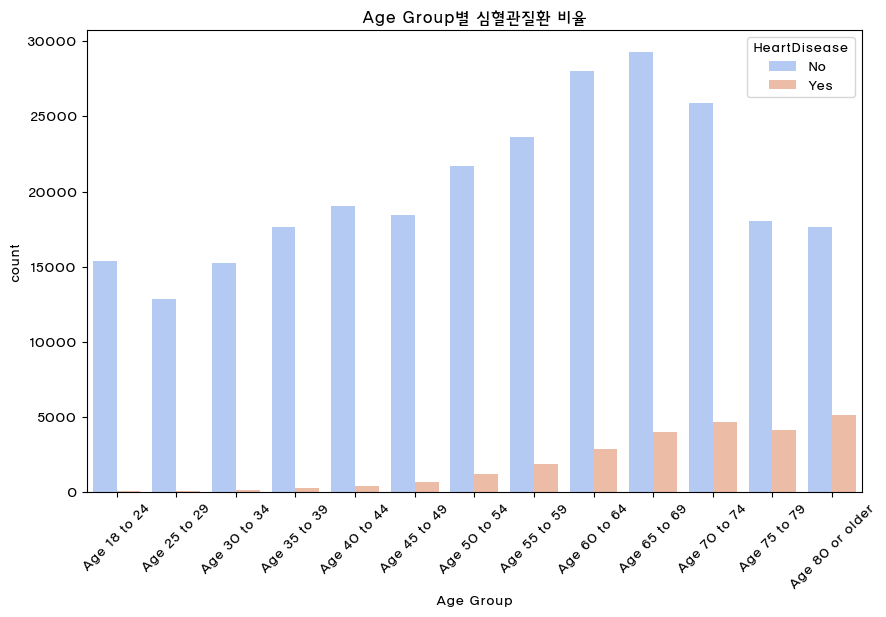

In [230]:
order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'AgeCategory', hue='HeartDisease', order=order, palette='coolwarm')

plt.xticks(rotation = 45)
plt.xlabel('Age Group')
plt.title('Age Group별 심혈관질환 비율')
plt.show()

## 성별별 심혈관질환 비율

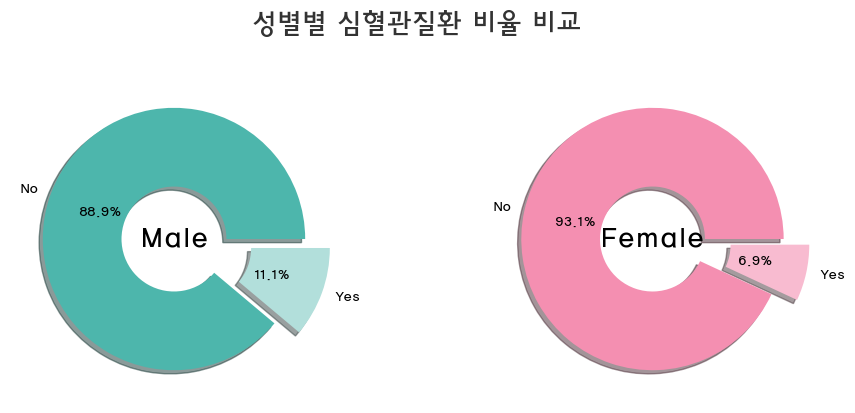

In [231]:
male_df = df[df['Sex'] == 'Male']
male_df
female_df = df[df['Sex'] == 'Female']

male_heart = male_df['HeartDisease'].value_counts()
male_heart

female_heart = female_df['HeartDisease'].value_counts()
female_heart
colors_male = ['#4DB6AC', '#B2DFDB']      # 남자: 청록색 계열
colors_female = ['#F48FB1', '#F8BBD0']    # 여자: 분홍색 계열

fig, ax = plt.subplots(1, 2, figsize=(10, 4))#B2DFDB
explode = [0, 0.2]
# 남성
ax[0].pie(male_heart, labels=male_heart.index, autopct = '%1.1f%%',
            wedgeprops={'width' : 0.6}, colors = colors_male, shadow=True,
            explode = explode
        )
ax[0].text(0, 0, 'Male', ha='center', va = 'center', fontsize = 20)

# 여성
ax[1].pie(female_heart, labels=female_heart.index, autopct = '%1.1f%%',
            wedgeprops={'width' : 0.6}, colors = colors_female, shadow=True,
            explode = explode
        )
ax[1].text(0, 0, 'Female', ha='center', va = 'center', fontsize = 20)

plt.suptitle(
    '성별별 심혈관질환 비율 비교',
    fontsize=20,
    fontweight='bold',
    color='#333333',
    y=1.02   
)

plt.tight_layout()
plt.show()




## 생활습관에 따른 심혈관질환 비율

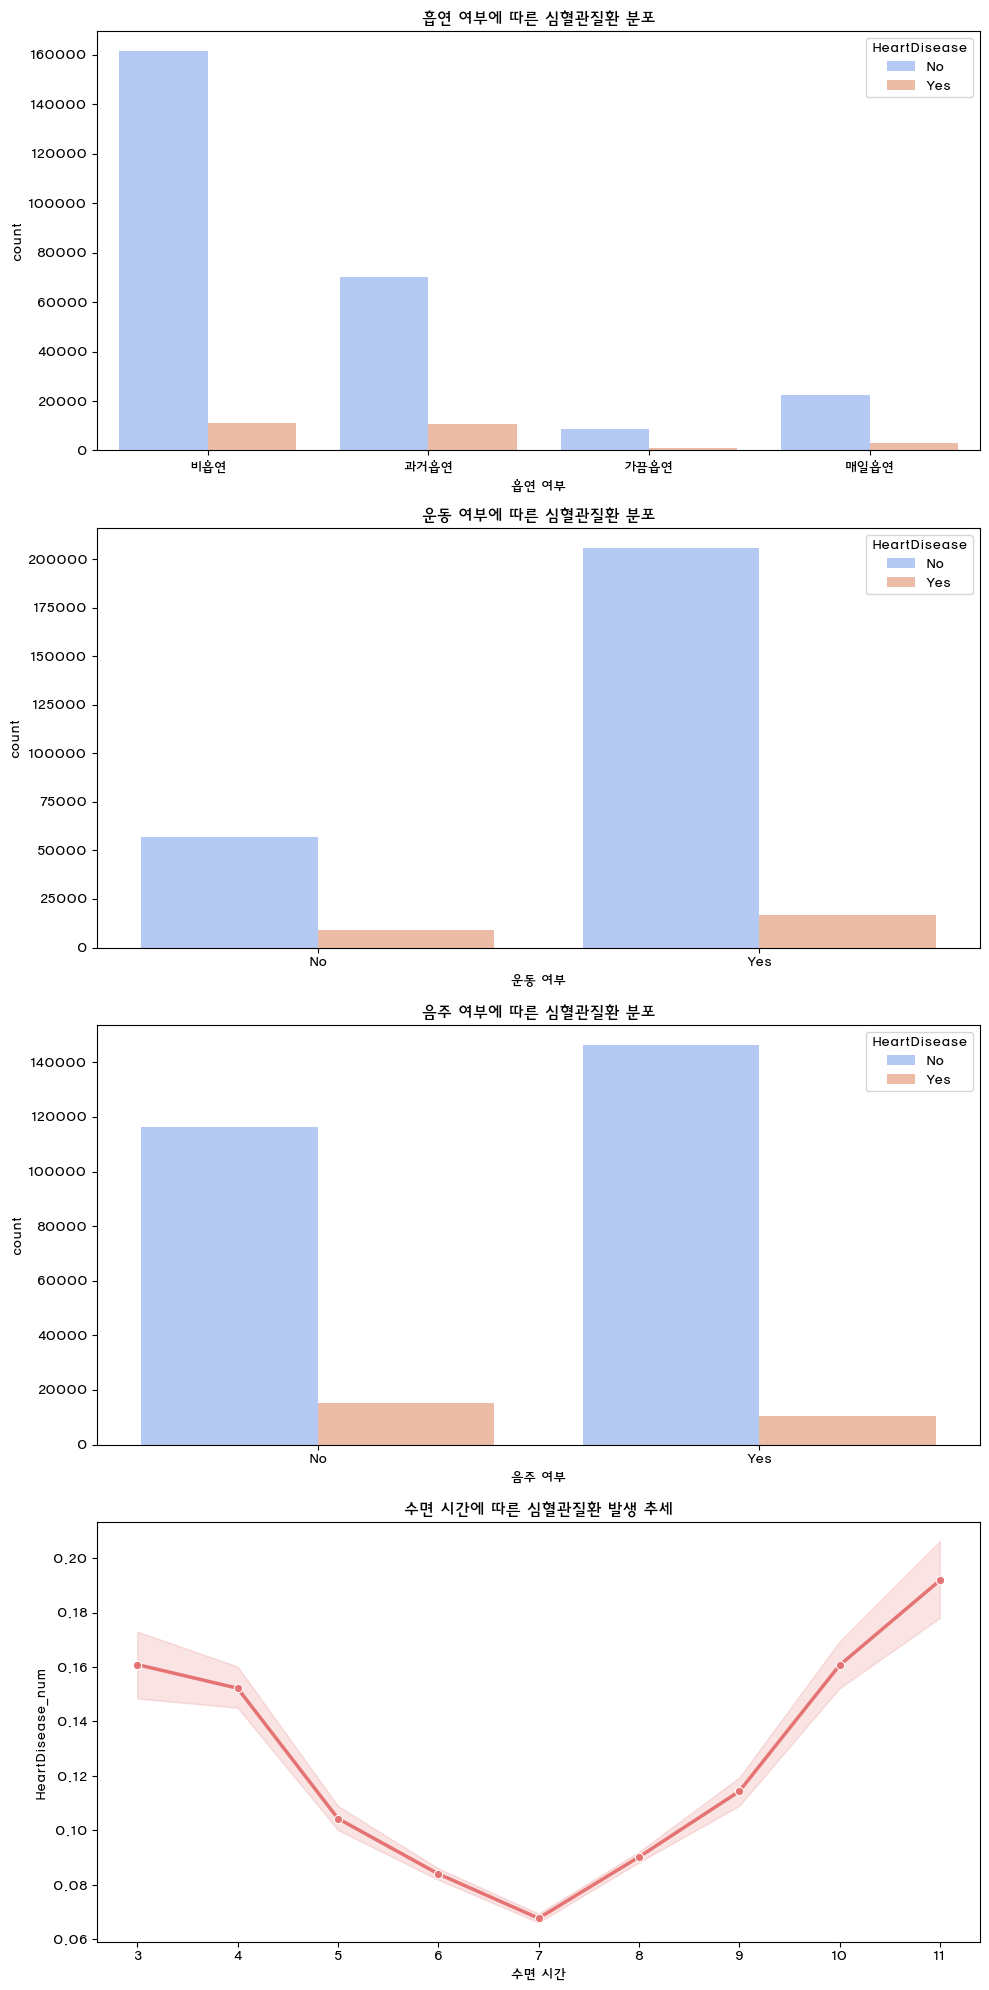

In [232]:
fig, ax = plt.subplots(4, 1, figsize=(10,20))

# 흡연여부
sns.countplot(data = df, x = 'SmokerStatus', palette='coolwarm', hue='HeartDisease', ax = ax[0])
ax[0].set_xlabel('흡연 여부')
ax[0].set_title('흡연 여부에 따른 심혈관질환 분포')


# 운동 여부
ax[1].set_xlabel('운동 여부')
sns.countplot(x = 'PhysicalActivities' , data = df,hue='HeartDisease',palette='coolwarm', ax = ax[1])
ax[1].set_title('운동 여부에 따른 심혈관질환 분포')

# 음주
ax[2].set_xlabel('음주 여부')
sns.countplot(x = 'AlcoholDrinkers' , data = df,hue='HeartDisease',palette='coolwarm', ax = ax[2])
ax[2].set_title('음주 여부에 따른 심혈관질환 분포')

# 수면 시간
sns.lineplot(data=df, x='SleepHours', y='HeartDisease_num', color='#E57373', marker='o', linewidth=2.5, ax=ax[3])
ax[3].set_xlabel('수면 시간')
ax[3].set_title('수면 시간에 따른 심혈관질환 발생 추세')


plt.tight_layout()
plt.show()

- 흡연 여부 : 비흡연자에 비해 과거 흡연했거나 현재 흡여중인 사람들의 비율이 높게 나옴
- 운도 여부 : 운동을 하지 않는 사람들이 운동을 하는 사람보다 높게 나옴
- 음주 여부 : 음주 여부는 그래프상으로 크게 상관없는듯 함
- 수면 시간 : 6 ~ 8시간 사이에서 비율이 낮고 5시간 이하 9 시간 이상에서 비율이 급격하게 올라감 
        -> 너무 안 자거나 너무 많이 자면 심장질환 발병률 up

## BMI에 따른

C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\1821177874.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='bmi_group', y='HeartDisease_num',


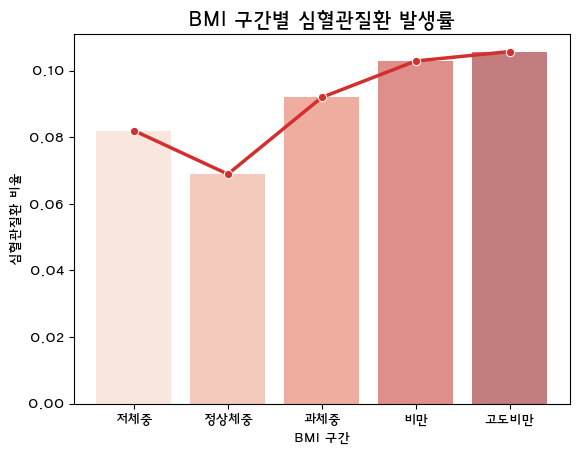

In [233]:
sns.barplot(data=df, x='bmi_group', y='HeartDisease_num',
             palette='Reds', alpha=0.6, errorbar=None)
sns.lineplot(data=df, x='bmi_group', y='HeartDisease_num',
              color='#D32F2F', marker='o', linewidth=2.5, errorbar=None)

plt.title('BMI 구간별 심혈관질환 발생률', fontsize=15, fontweight='bold')
plt.xlabel('BMI 구간')
plt.ylabel('심혈관질환 비율')
plt.show()

In [234]:
df.describe()

,index,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease_num
count,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000,288597.000000
mean,223405.012398,4.222074,4.217230,7.013035,1.703882,83.403122,28.637781,0.089246
std,128504.857213,8.525216,8.176256,1.331387,0.106734,21.286697,6.512102,0.285098
min,1.000000,0.000000,0.000000,3.000000,0.910000,22.680000,12.020000,0.000000
25%,112782.000000,0.000000,0.000000,6.000000,1.630000,68.040000,24.210000,0.000000
50%,222961.000000,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000,0.000000
75%,334783.000000,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000,0.000000
max,445131.000000,30.000000,30.000000,11.000000,2.410000,292.570000,97.650000,1.000000


C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\902825583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['AlcoholDrinkers'] = df_corr['AlcoholDrinkers'].map({'Yes' : 1, 'No' : 0})
C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\902825583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['PhysicalActivities'] = df_corr['PhysicalActivities'].map({'Yes' : 1, 'No' : 0})
C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\902825583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

bmi_group             category
SleepHours             float64
HeartDisease_num         int64
AlcoholDrinkers          int64
PhysicalActivities       int64
AgeCategory              int64
SmokerStatus             int64
BMI                    float64
dtype: object


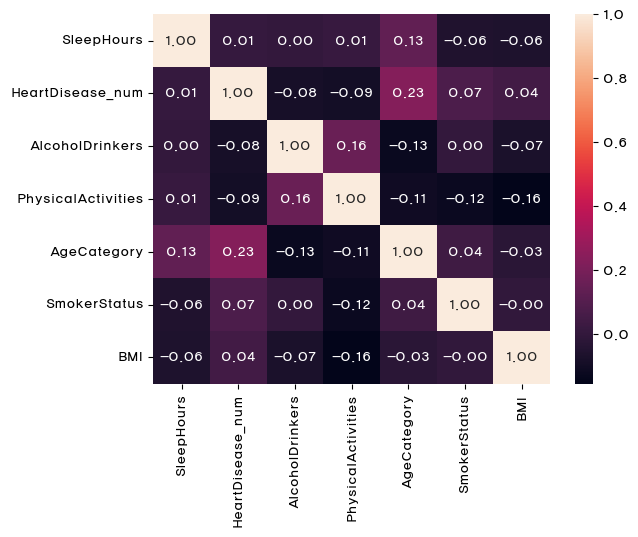

In [ ]:
df_corr = df[['bmi_group', 'SleepHours', 'HeartDisease_num', 'AlcoholDrinkers', 'PhysicalActivities', 'AgeCategory', 'SmokerStatus']]

df_corr['AlcoholDrinkers'] = df_corr['AlcoholDrinkers'].map({'Yes' : 1, 'No' : 0})
df_corr['PhysicalActivities'] = df_corr['PhysicalActivities'].map({'Yes' : 1, 'No' : 0})
df_corr['SmokerStatus'] = df_corr['SmokerStatus'].map({'비흡연' : 0, '과거흡연' : 1, '가끔흡연' : 2, '매일흡연' : 3})

# 각 상품의 출현 순서에 따라 정수를 순차적으로 매칭한 코드 열 생성
# df['코드'] = df['상품'].astype('category').cat.codes
# df['코드'] = df['상품'].factorize()[0]

df_corr['bmi_group'] = df['bmi_group'].map({
    '저체중' : 1,
    '정상체중' : 0,
    '과체중' : 2,
    '비만' : 3,
    '고도비만' : 4
    
})
df_corr['AgeCategory'] = df['AgeCategory'].map({
    'Age 18 to 24' : 0,
    'Age 25 to 29' : 1,
    'Age 30 to 34' : 2,
    'Age 35 to 39' : 3,
    'Age 40 to 44' : 4,
    'Age 45 to 49' : 5,
    'Age 50 to 54' : 6,
    'Age 55 to 59' : 7,
    'Age 60 to 64' : 8,
    'Age 65 to 69' : 9,
    'Age 70 to 74' : 10,
    'Age 75 to 79' : 11,
    'Age 80 or older' : 12
})

corr_mat = df_corr.corr(numeric_only = True)
print(df_corr.dtypes)
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()


C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\1953618397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


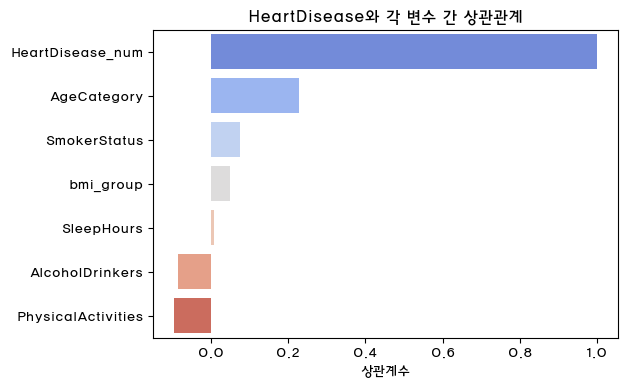

In [236]:
target_corr = df_corr.corr()['HeartDisease_num'].sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('HeartDisease와 각 변수 간 상관관계')
plt.xlabel('상관계수')
plt.ylabel('')
plt.show()


## 왜 why ? 남자가 더 심혈관질환 발병률이 높을까 ?

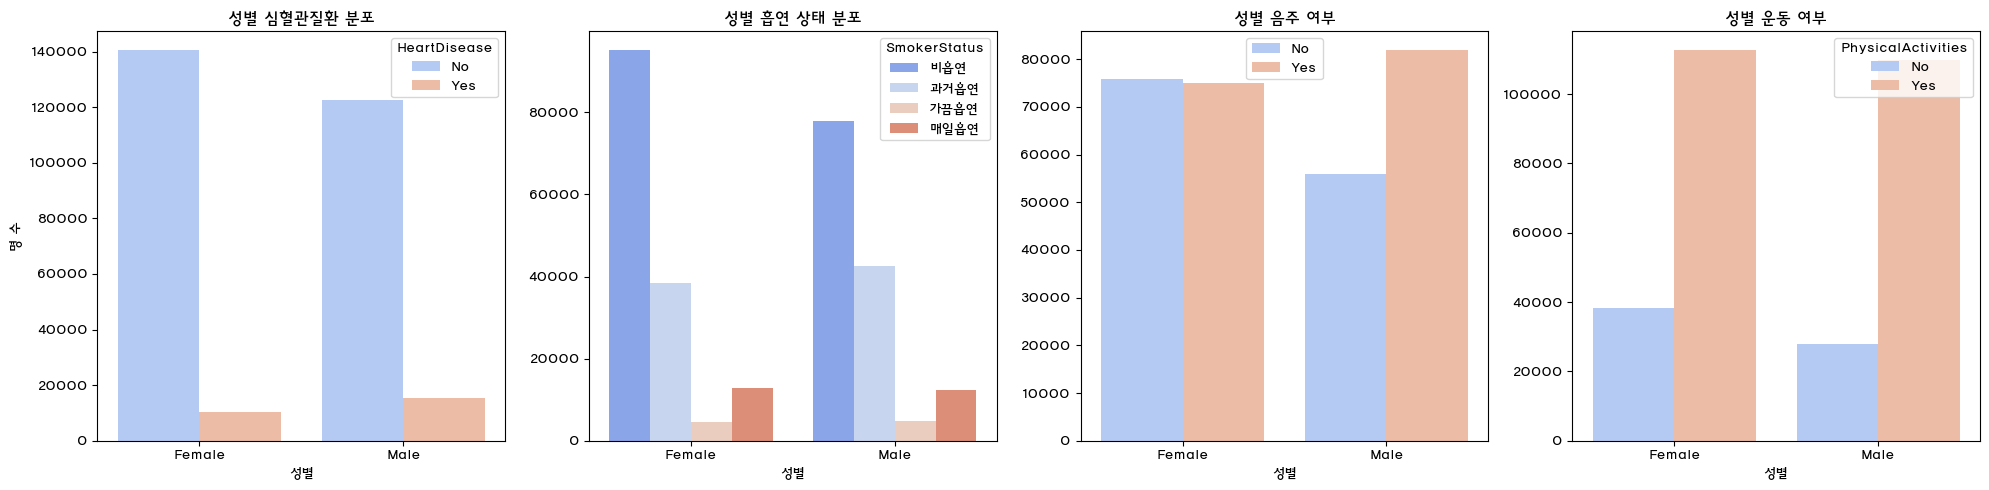

In [237]:
fig, ax = plt.subplots(1,4, figsize = (20, 5))
sns.countplot(data=df, x = 'Sex', hue = 'HeartDisease', palette='coolwarm', ax = ax[0])
ax[0].set_title('성별 심혈관질환 분포')
ax[0].set_xlabel('성별')
ax[0].set_ylabel('명 수')

sns.countplot(data=df, x = 'Sex', hue = 'SmokerStatus', palette='coolwarm', ax = ax[1])
ax[1].set_title('성별 흡연 상태 분포')
ax[1].set_xlabel('성별')
ax[1].set_ylabel('')

sns.countplot(data=df, x = 'Sex', hue = 'AlcoholDrinkers', palette='coolwarm', ax = ax[2])
ax[2].set_title('성별 음주 여부')
ax[2].set_xlabel('성별')
ax[2].set_ylabel('')

sns.countplot(data=df, x = 'Sex', hue = 'PhysicalActivities', palette='coolwarm', ax = ax[3])
ax[3].set_title('성별 운동 여부')
ax[3].set_xlabel('성별')
ax[3].set_ylabel('')

ax[2].legend(loc = 'upper center')

plt.tight_layout()
plt.show()

In [238]:
male_df['SleepHours'].value_counts().sort_index().index

Index([3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64', name='SleepHours')

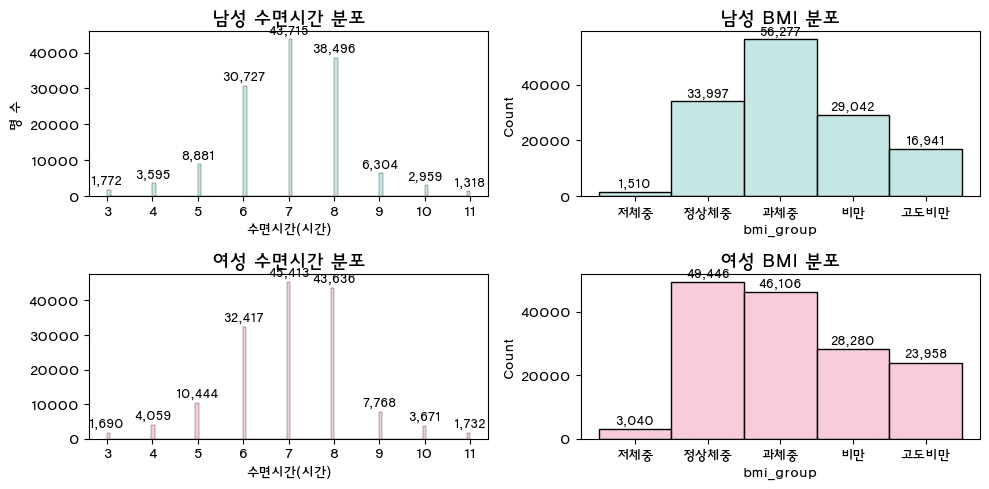

In [239]:
fig, ax = plt.subplots(2, 2 , figsize= (10,5))

sns.histplot(data = male_df, x = 'SleepHours', ax = ax[0][0], color='#B2DFDB')
sns.histplot(data= male_df, x = 'bmi_group', ax = ax[0][1], color='#B2DFDB')
ax[0][0].set_title('남성 수면시간 분포', fontsize=14)
ax[0][0].set_xlabel('수면시간(시간)')
ax[0][0].set_ylabel('명 수')
ax[0][1].set_title('남성 BMI 분포', fontsize=14)

male_sleep = male_df['SleepHours'].value_counts().sort_index()
for hour, count in male_sleep.items():
    ax[0][0].text(hour, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')
    
male_bmi = male_df['bmi_group'].value_counts().reindex(['저체중','정상체중','과체중','비만','고도비만'])
for i, (label, count) in enumerate(male_bmi.items()):
    ax[0][1].text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')

sns.histplot(data = female_df, x= 'SleepHours', ax = ax[1][0], color='#F8BBD0')
sns.histplot(data= female_df, x = 'bmi_group', ax = ax[1][1], color='#F8BBD0')
ax[1][0].set_title('여성 수면시간 분포', fontsize=14)
ax[1][0].set_xlabel('수면시간(시간)')
ax[1][0].set_ylabel('')

ax[1][1].set_title('여성 BMI 분포', fontsize=14)

female_sleep = female_df['SleepHours'].value_counts().sort_index()
for hour, count in female_sleep.items():
    ax[1][0].text(hour, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')

female_bmi = female_df['bmi_group'].value_counts().reindex(['저체중','정상체중','과체중','비만','고도비만'])
for i, (label, count) in enumerate(female_bmi.items()):
    ax[1][1].text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')

# for i, time in enumerate(male_df['SleepHours'].value_counts().sort_index()) :
#     ax[0].text(i, time, time, ha = 'center')
# for i, time in enumerate(female_df['SleepHours'].value_counts().sort_index()) :
#     ax[1].text(i, time, time, ha = 'center')

plt.tight_layout()
plt.show()

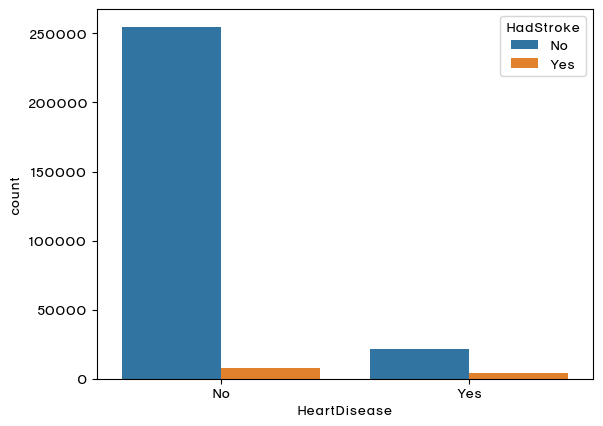

In [240]:
sns.countplot(data=df, x = 'HeartDisease', hue='HadStroke')



plt.show()



## 심장병이 있는 사람들은 뇌졸중 발병률이 더 높을까 ? ? ?

### 한 번 알아보자 !


Text(0.5, 1.02, '심장질환 유무에 따른 뇌졸중 환자 비율 비교')

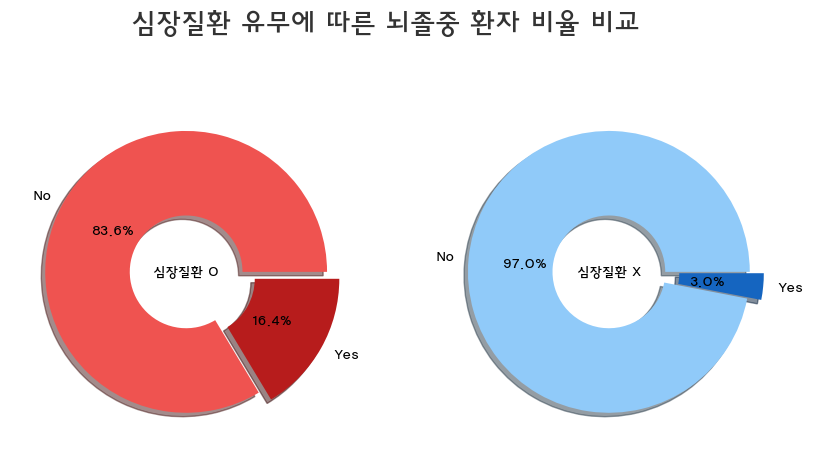

In [241]:
heart_df = df[df['HeartDisease'] == 'Yes']
no_heart_df = df[df['HeartDisease'] == 'No']


heart_count = heart_df['HadStroke'].value_counts()
no_heart_count = no_heart_df['HadStroke'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

explode = [0, 0.1]
ax[0].pie(heart_count, labels= heart_count.index, 
        autopct = '%1.1f%%',
        wedgeprops={'width' : 0.6}, colors = ['#EF5350','#B71C1C'], shadow=True,
        explode = explode
        
        )

ax[1].pie(no_heart_count, labels = no_heart_count.index, 
          autopct = '%1.1f%%',
          wedgeprops = {'width' : 0.6}, colors = ['#90CAF9', '#1565C0'], shadow = True, 
          explode = explode)


ax[0].text(0, 0, '심장질환 O', ha='center', va = 'center', fontsize = 10)
ax[1].text(0, 0, '심장질환 X', ha='center', va = 'center', fontsize = 10)
plt.suptitle(
    '심장질환 유무에 따른 뇌졸중 환자 비율 비교',
    fontsize=20,
    fontweight='bold',
    color='#333333',
    y=1.02   
)






# 비만은 만병의 근원인가 ?

C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\3348532951.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  angina_rate = df.groupby('bmi_group')['HadAngina'].apply(lambda x: (x == 'Yes').mean())
C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\3348532951.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_rate = df.groupby('bmi_group')['HadHeartAttack'].apply(lambda x: (x == 'Yes').mean())
C:\Users\TJ\AppData\Local\Temp\ipykernel_17504\3348532951.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

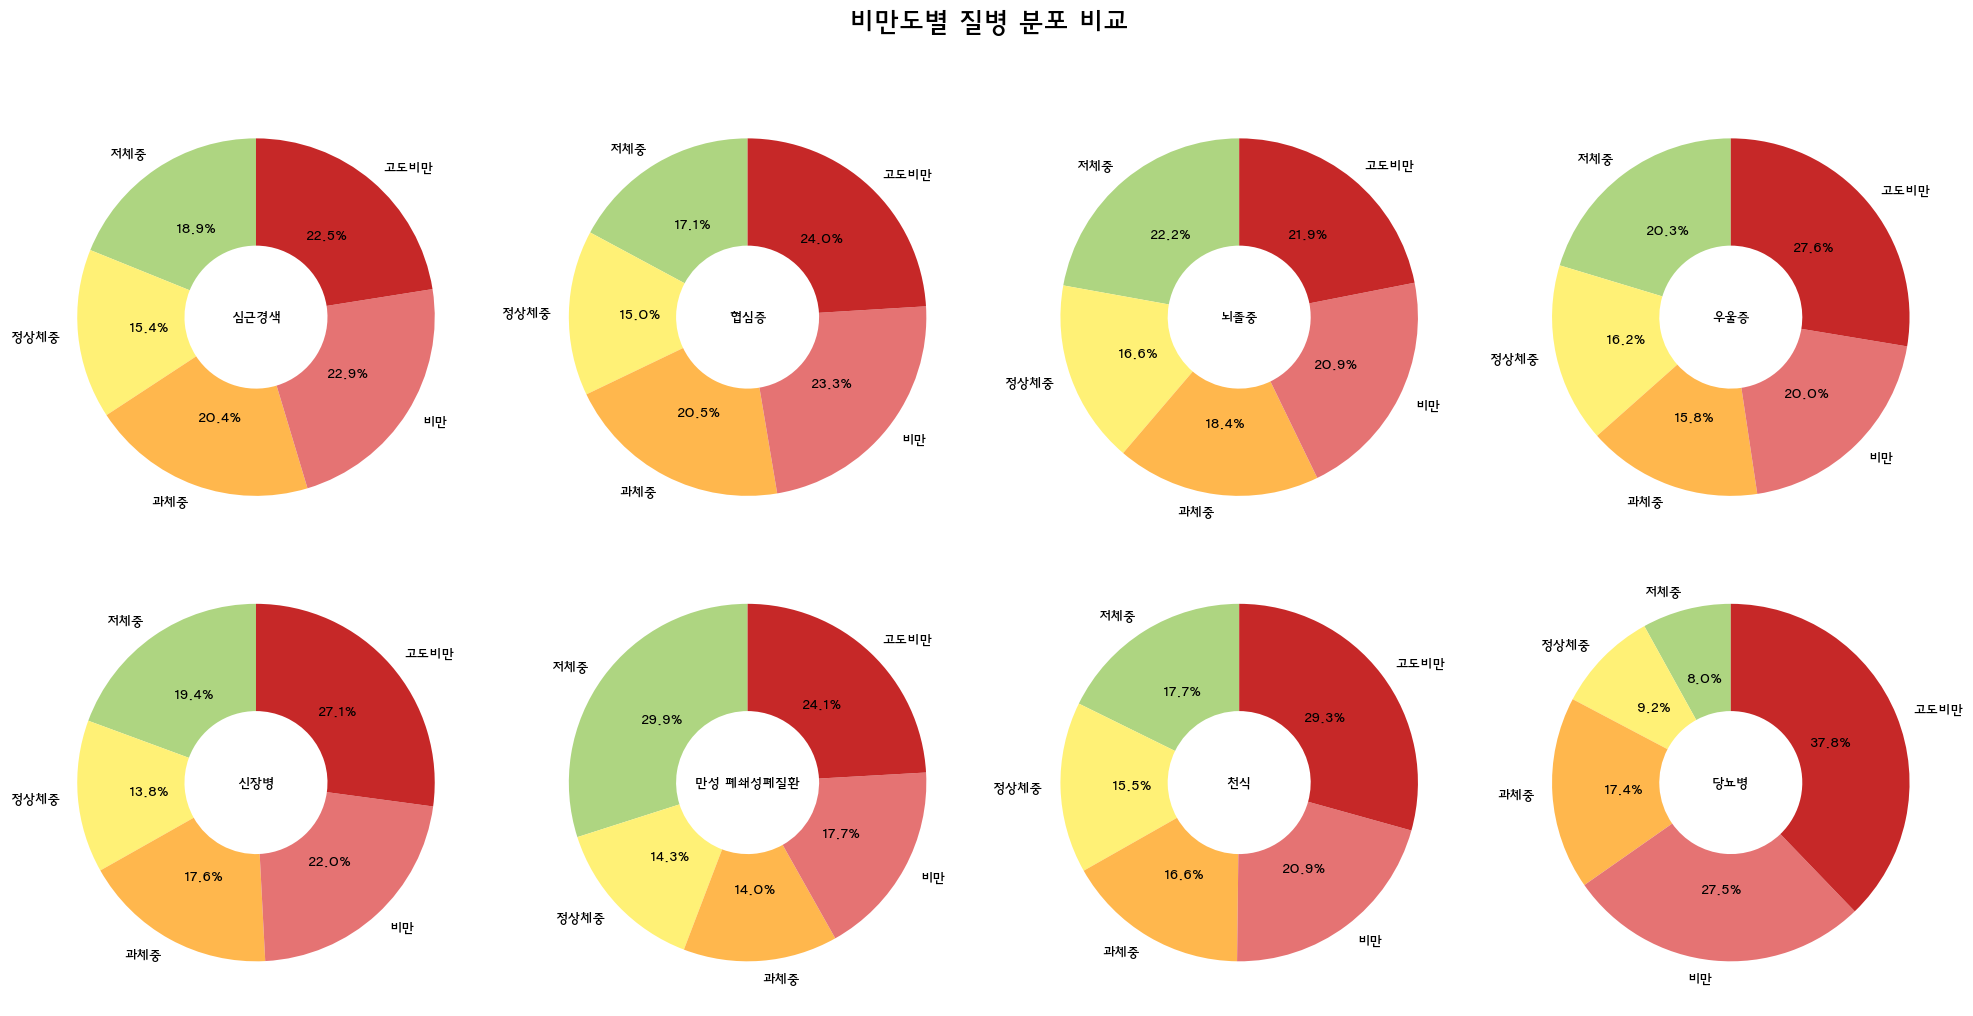

In [300]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

angina_count = df[df['HadAngina'] == 'Yes']

angina_count['HadAngina'].value_counts()

angina_rate = df.groupby('bmi_group')['HadAngina'].apply(lambda x: (x == 'Yes').mean())
heart_attack_rate = df.groupby('bmi_group')['HadHeartAttack'].apply(lambda x: (x == 'Yes').mean())
stroke_rate = df.groupby('bmi_group')['HadStroke'].apply(lambda x: (x == 'Yes').mean())
depressive_disorder_rate = df.groupby('bmi_group')['HadDepressiveDisorder'].apply(lambda x: (x == 'Yes').mean())
kidney_rate = df.groupby('bmi_group')['HadKidneyDisease'].apply(lambda x: (x == 'Yes').mean())
copd_rate = df.groupby('bmi_group')['HadCOPD'].apply(lambda x: (x == 'Yes').mean())
asthma_rate = df.groupby('bmi_group')['HadAsthma'].apply(lambda x: (x == 'Yes').mean())
diabetes_rate = df.groupby('bmi_group')['HadDiabetes'].apply(lambda x: (x == 'Yes').mean())

# 심근경색
ax[0][0].pie(
    heart_attack_rate,
    labels=heart_attack_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)

ax[0][0].text(0, 0, '심근경색', ha='center', va='center')

# 협심증
ax[0][1].pie(
    angina_rate,
    labels=angina_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][1].text(0, 0, '협심증', ha='center', va='center')

# 뇌졸중
ax[0][2].pie(
    stroke_rate,
    labels=stroke_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][2].text(0, 0, '뇌졸중', ha='center', va='center')

# 우울증
ax[0][3].pie(
    depressive_disorder_rate,
    labels=depressive_disorder_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][3].text(0, 0, '우울증', ha='center', va='center')

# 신장병
ax[1][0].pie(
    kidney_rate,
    labels=kidney_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][0].text(0, 0, '신장병', ha='center', va='center')

# 만성 폐쇄폐질환
ax[1][1].pie(
    copd_rate,
    labels=copd_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][1].text(0, 0, '만성 폐쇄성폐질환', ha='center', va='center')

# 천식
ax[1][2].pie(
    asthma_rate,
    labels=asthma_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][2].text(0, 0, '천식', ha='center', va='center')

# 당뇨
ax[1][3].pie(
    diabetes_rate,
    labels=diabetes_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][3].text(0, 0, '당뇨병', ha='center', va='center')


plt.suptitle('비만도별 질병 분포 비교', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
df2 = df.groupby()